# <font style = "color:rgb(50,120,229)">Measures of Sharpness</font>

In order to perfrom autofocus, we must be able to quantify how sharp is an image, in order to pick the best settings, this will rely heavily on calculating first or second order gradients.
I will implement algorithms from the following papers and test them agaisnt the same video.

1. [Diatom autofocusing in brighteld microscopy: a comparative study](http://optica.csic.es/papers/icpr2k.pdf): This paper has several measures of sharpess. 

2. [Shape from Focus](http://www1.cs.columbia.edu/CAVE/publications/pdfs/Nayar_TR89.pdf): This paper is about estimating the 3D shape of a scene using focus information. In Section 5, the author discusses a measure of focus. 

For simplicity I won't try to find a region of interest on which to evalaute the sharpness but will do so on the whole image





In [3]:
# Import modules
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## <font style = "color:rgb(50,120,229)">Tenengrad focus measure</font>


In [10]:
def tenengrad(image, threshold=0):
    sobelx = cv2.Sobel(image, cv2.CV_32F, 1, 0)
    sobely = cv2.Sobel(image,cv2.CV_32F,0,1)
    sobel_sq = np.square(sobelx) + np.square(sobely)
    sobel = np.sqrt(sobel_sq)

    tenengrad_measure = np.sum(sobel_sq[sobel > threshold])

    return tenengrad_measure

## <font style = "color:rgb(50,120,229)">Variance of Gradient magnitudes</font>


In [11]:
def var_gradient(image, threshold=0):
    width, height = image.shape[:2]
    sobelx = cv2.Sobel(image, cv2.CV_32F, 1, 0)
    sobely = cv2.Sobel(image,cv2.CV_32F,0,1)
    sobel = np.sqrt(np.square(sobelx) + np.square(sobely))
    
    sobel_mean = np.sum(sobel)/(width*height)
    
    sob_var = np.sum(np.square(sobel[sobel > threshold] - sobel_mean)) 
    
    return sob_var

## <font style = "color:rgb(50,120,229)">Variance of absolute values of Laplacian</font>


In [4]:
def var_abs_laplacian(image):
    width, height = image.shape[:2]
    abs_laplacian = np.abs(cv2.Laplacian(image, cv2.CV_32F,ksize=3,scale=1,delta=0))
    
    #Equation 13 from 1
    mean_abs_value = np.sum(abs_laplacian)/(width*height)
    
    #Equation 12 from 1
    lap_var = np.sum(np.square(abs_laplacian - mean_abs_value))
    
    return lap_var

## <font style = "color:rgb(50,120,229)">Sum modified Laplacian</font>


In [5]:
def sum_modified_laplacian(im):
    y_kernel =np.array((
    [0, -1, 0],
    [0,  2, 0],
    [0, -1, 0]), dtype="int")
    x_kernel =np.array((
    [0, 0, 0],
    [-1,2,-1],
    [0, 0, 0]), dtype="int")
    
    ML = np.abs(cv2.filter2D(im,-1,y_kernel)) + np.abs(cv2.filter2D(im,-1,x_kernel))
    SML = np.sum(ML)
    
    return SML

## <font style = "color:rgb(50,120,229)">Testing
    
We will use our measures on a video going in and out of focus to find the sharpest frame, which could be used to autofocus on our image. 

Total number of frames : 186
Frame ID of the best frame [Variance of absolute Laplacian]: 1
Frame ID of the best frame [Sum modified Laplacian]: 1
Frame ID of the best frame [Tenengrad focus measure]: 1
Frame ID of the best frame [Variance of gradient magnitudes]: 1
Frame ID of the best frame [Sum modified Laplacian]: 1
Frame ID of the best frame [Variance of absolute Laplacian]: 9
Frame ID of the best frame [Sum modified Laplacian]: 9
Frame ID of the best frame [Sum modified Laplacian]: 9
Frame ID of the best frame [Variance of absolute Laplacian]: 53
Frame ID of the best frame [Sum modified Laplacian]: 53
Frame ID of the best frame [Tenengrad focus measure]: 53
Frame ID of the best frame [Variance of gradient magnitudes]: 53
Frame ID of the best frame [Tenengrad focus measure]: 53
Frame ID of the best frame [Tenengrad focus measure]: 53
Frame ID of the best frame [Variance of gradient magnitudes]: 53
Frame ID of the best frame [Variance of absolute Laplacian]: 57
Frame ID of the best

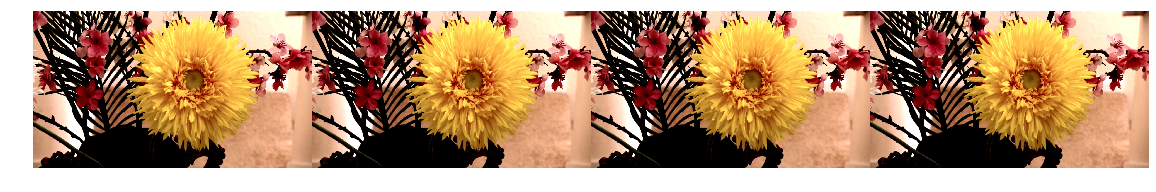

In [14]:
# Read input video filename
filename = './videos/focus-test.mp4'

# Create a VideoCapture object
cap = cv2.VideoCapture(filename)

# Read first frame from the video
ret, frame = cap.read()

# Display total number of frames in the video
print("Total number of frames : {}".format(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))))

maxV1 = 0
maxV2 = 0
maxV3 = 0
maxV4 = 0

# Frame with maximum measure of focus
# Obtained using methods 1 and 2
bestFrame1 = 0 
bestFrame2 = 0 
bestFrame3 = 0 
bestFrame4 = 0 

# Frame ID of frame with maximum measure
# of focus
# Obtained using methods 1 and 2
bestFrameId1 = 0 
bestFrameId2 = 0 
bestFrameId3 = 0 
bestFrameId4 = 0 

# Get measures of focus from both methods
val1 = var_abs_laplacian(frame)
val2 = sum_modified_laplacian(frame)
val3 = tenengrad(frame)
val4 = var_gradient(frame)

# Specify the ROI for flower in the frame
# UPDATE THE VALUES BELOW
top = 0
left = 0
bottom = frame.shape[0]
right = frame.shape[1]

# Iterate over all the frames present in the video
while(ret):
    # Crop the flower region out of the frame
    flower = frame[left:right, top:bottom]
    # Get measures of focus from both methods
    val1 = var_abs_laplacian(frame)
    val2 = sum_modified_laplacian(frame)
    val3 = tenengrad(frame)
    val4 = var_gradient(frame)
    
    # If the current measure of focus is greater 
    # than the current maximum
    if val1 > maxV1 :
        # Revise the current maximum
        maxV1 = val1
        # Get frame ID of the new best frame
        bestFrameId1 = int(cap.get(cv2.CAP_PROP_POS_FRAMES))
        # Revise the new best frame
        bestFrame1 = frame.copy()
        print("Frame ID of the best frame [Variance of absolute Laplacian]: {}".format(bestFrameId1))

    # If the current measure of focus is greater 
    # than the current maximum
    if val2 > maxV2 : 
        # Revise the current maximum
        maxV2 = val2
        # Get frame ID of the new best frame
        bestFrameId2 = int(cap.get(cv2.CAP_PROP_POS_FRAMES))
        # Revise the new best frame
        bestFrame2 = frame.copy()
        print("Frame ID of the best frame [Sum modified Laplacian]: {}".format(bestFrameId1))
        
    if val3 > maxV3 : 
        # Revise the current maximum
        maxV3 = val3
        # Get frame ID of the new best frame
        bestFrameId3 = int(cap.get(cv2.CAP_PROP_POS_FRAMES))
        # Revise the new best frame
        bestFrame3 = frame.copy()
        print("Frame ID of the best frame [Tenengrad focus measure]: {}".format(bestFrameId1))
        
    if val4 > maxV4 : 
        # Revise the current maximum
        maxV4 = val4
        # Get frame ID of the new best frame
        bestFrameId4 = int(cap.get(cv2.CAP_PROP_POS_FRAMES))
        # Revise the new best frame
        bestFrame4 = frame.copy()
        print("Frame ID of the best frame [Variance of gradient magnitudes]: {}".format(bestFrameId1))
        
    # Read a new frame
    ret, frame = cap.read()


print("================================================")
# Print the Frame ID of the best frame
print("Frame ID of the best frame [Variance of absolute Laplacian]: {}".format(bestFrameId1))
print("Frame ID of the best frame [Sum modified Laplacian]: {}".format(bestFrameId2))
print("Frame ID of the best frame [Tenengrad focus measure]: {}".format(bestFrameId3))
print("Frame ID of the best frame [Variance of gradient magnitudes]: {}".format(bestFrameId3))

# Release the VideoCapture object
cap.release()

# Stack the best frames obtained using both methods
out = np.hstack((bestFrame1, bestFrame2, bestFrame3, bestFrame4))

# Display the stacked frames
plt.figure(figsize=[20,10])
plt.imshow(out[:,:,::-1]);
plt.axis('off');